In [1]:
# pip3 install -U scikit-fuzzy # http://pythonhosted.org/scikit-fuzzy/auto_examples/index.html
# Instalar via terminal

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Presença com o crime organizado

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


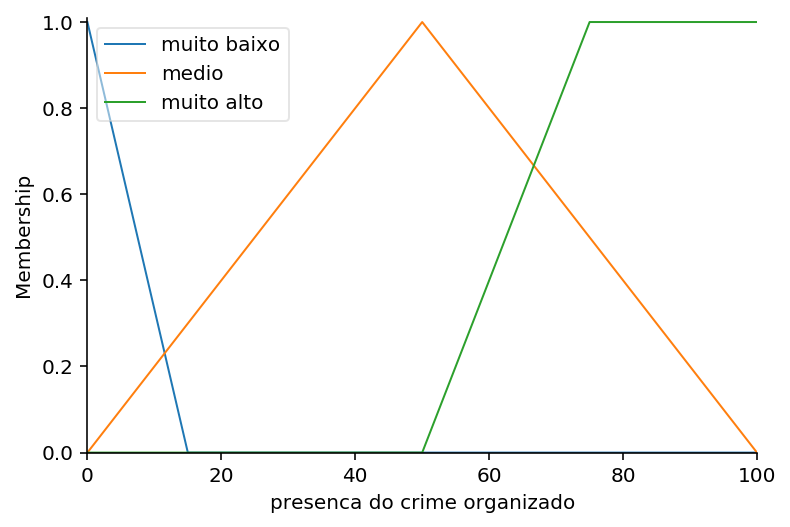

In [3]:
# Presença do crime organizado
co = ctrl.Antecedent(np.arange(0, 101, 1), 'presenca do crime organizado')

co['muito baixo'] = fuzz.trimf(co.universe, [0, 0, 15])
co['medio'] = fuzz.trimf(co.universe, [0, 50, 100])
co['muito alto'] = fuzz.trapmf(co.universe, [50, 75, 100, 100])

co.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


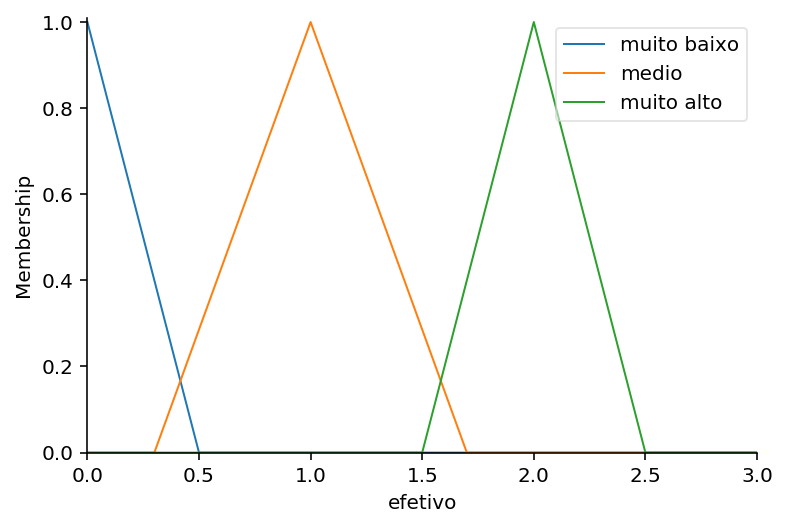

In [4]:
# Estimativa de efetivo (co)
ef_co = ctrl.Consequent(np.arange(0, 3.1, 0.1), 'efetivo')

ef_co['muito baixo'] = fuzz.trimf(ef_co.universe, [0, 0, 0.5])
ef_co['medio'] = fuzz.trimf(ef_co.universe, [0.3, 1.0, 1.7])
ef_co['muito alto'] = fuzz.trimf(ef_co.universe, [1.5, 2.0, 2.5])

ef_co.view()

In [5]:
# Regras (co)
regra_co_1 = ctrl.Rule(co['muito alto'], ef_co['muito alto'])
regra_co_2 = ctrl.Rule(co['medio'], ef_co['medio'])
regra_co_3 = ctrl.Rule(co['muito baixo'], ef_co['muito baixo'])

In [6]:
## Cria um sistema de controle e uma simulação para o número de eleitores
eleicao_co_ctrl = ctrl.ControlSystem([regra_co_1, regra_co_2, regra_co_3])
eleicao_co_sim = ctrl.ControlSystemSimulation(eleicao_co_ctrl)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


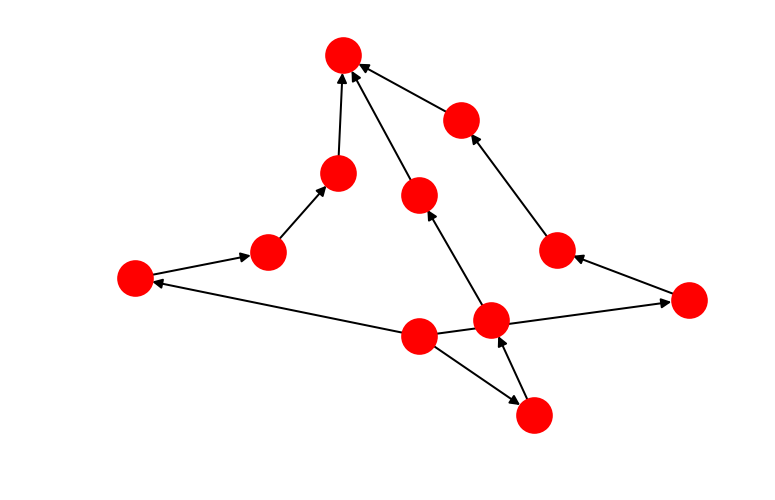

In [7]:
eleicao_co_ctrl.view()

OrderedDict([('efetivo', 0.16666666666666663)])


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


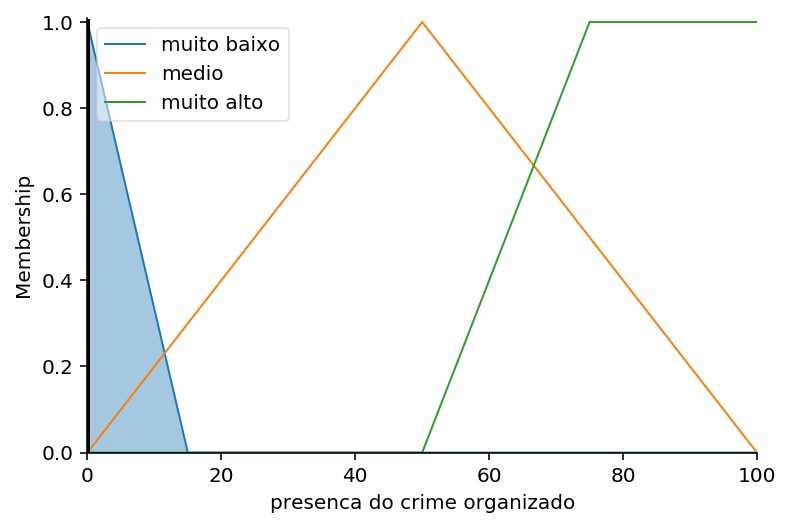

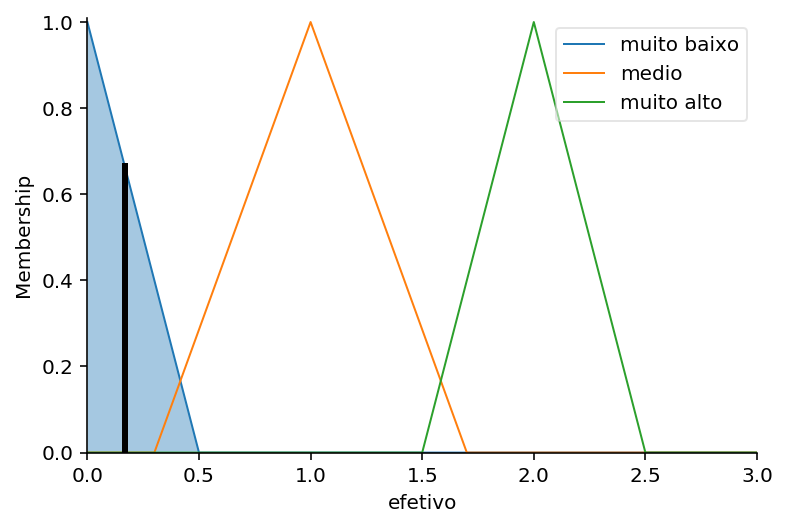

In [8]:
# Entrada
eleicao_co_sim.input['presenca do crime organizado'] = 0

# Calcula
eleicao_co_sim.compute()
n_ef_co = eleicao_co_sim.output
print(n_ef_co)

# Gráfico dos antecedentes e consequentes a partir dos cálculos
co.view(sim=eleicao_co_sim)
ef_co.view(sim=eleicao_co_sim)

# Número de eleitores

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


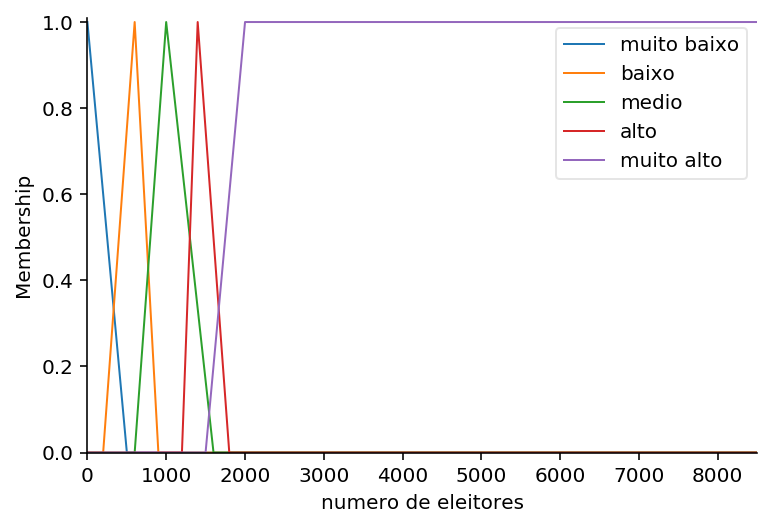

In [9]:
# Número de eleitores
ne = ctrl.Antecedent(np.arange(0, 8501, 1), 'numero de eleitores')

ne['muito baixo'] = fuzz.trimf(ne.universe, [0, 0, 500])
ne['baixo'] = fuzz.trimf(ne.universe, [200, 600, 900])
ne['medio'] = fuzz.trimf(ne.universe, [600, 1000, 1600])
ne['alto'] = fuzz.trimf(ne.universe, [1200, 1400, 1800])
ne['muito alto'] = fuzz.trapmf(ne.universe, [1500, 2000, 8500, 8500])

ne.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


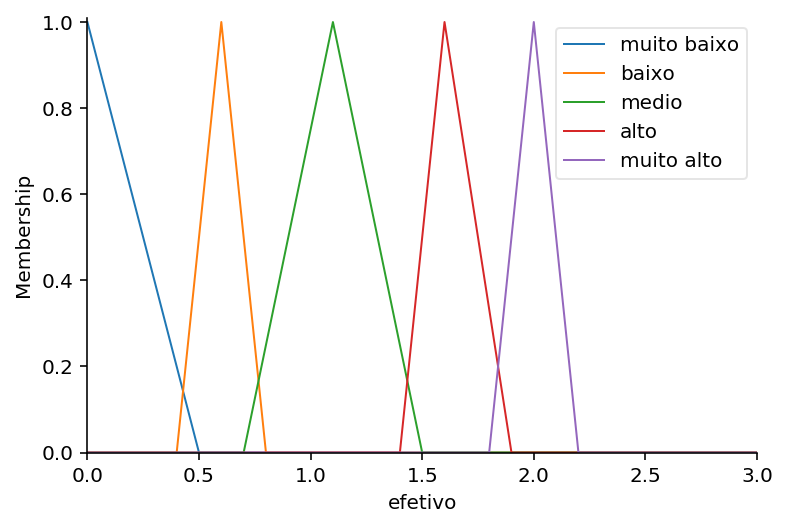

In [10]:
# Estimativa de efetivo (ne)
ef_ne = ctrl.Consequent(np.arange(0, 3.1, 0.1), 'efetivo')

ef_ne['muito baixo'] = fuzz.trimf(ef_ne.universe, [0, 0, 0.5])
ef_ne['baixo'] = fuzz.trimf(ef_ne.universe, [0.4, 0.6, 0.8])
ef_ne['medio'] = fuzz.trimf(ef_ne.universe, [0.7, 1.1, 1.5])
ef_ne['alto'] = fuzz.trimf(ef_ne.universe, [1.4, 1.6, 1.9])
ef_ne['muito alto'] = fuzz.trimf(ef_ne.universe, [1.8, 2.0, 2.2])

ef_ne.view()

In [11]:
# Número de eleitores (ne)
regra_ne_1 = ctrl.Rule((ne['muito alto'] | ne['alto']), ef_ne['muito alto'])
regra_ne_2 = ctrl.Rule(ne['medio'], ef_ne['medio'])
regra_ne_3 = ctrl.Rule(ne['baixo'], ef_ne['baixo'])
regra_ne_4 = ctrl.Rule(ne['muito baixo'], ef_ne['muito baixo'])

In [12]:
## Cria um sistema de controle e uma simulação para o número de eleitores
eleicao_ne_ctrl = ctrl.ControlSystem([regra_ne_1, regra_ne_2, regra_ne_3, regra_ne_4])
eleicao_ne_sim = ctrl.ControlSystemSimulation(eleicao_ne_ctrl)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


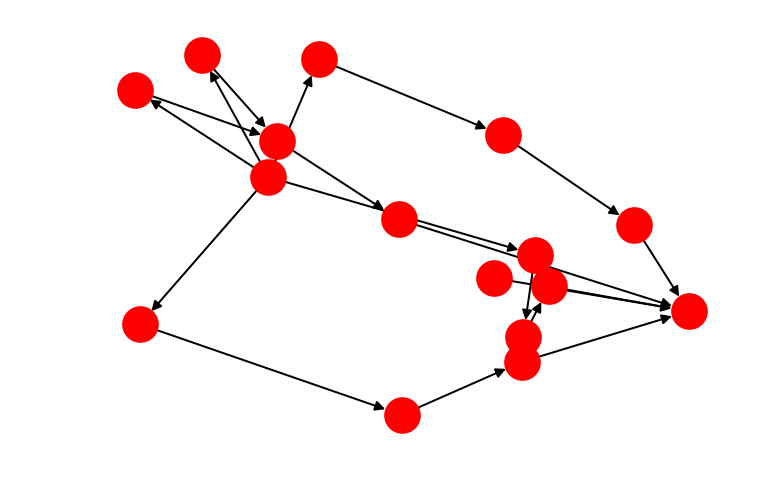

In [13]:
eleicao_ne_ctrl.view()

OrderedDict([('efetivo', 0.6000000000000001)])


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


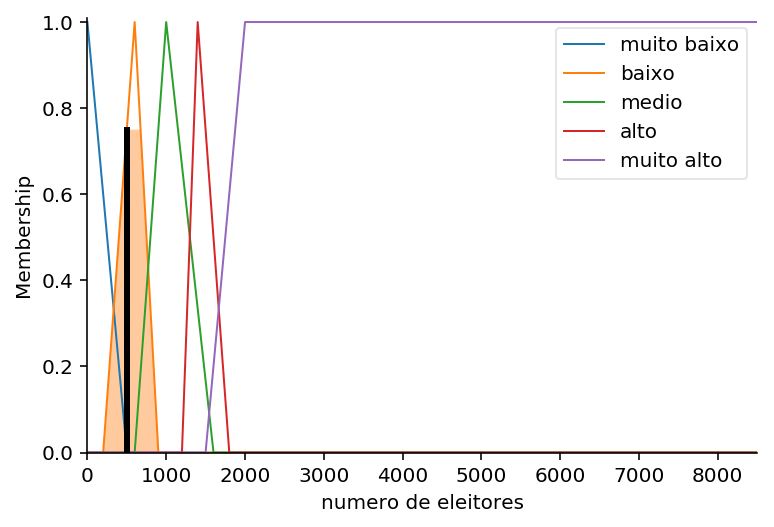

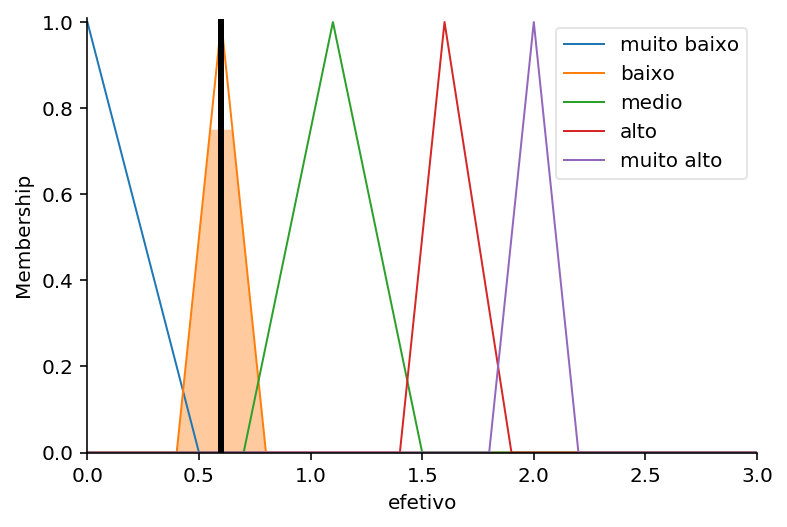

In [14]:
# Entrada
eleicao_ne_sim.input['numero de eleitores'] = 500

# Calcula
eleicao_ne_sim.compute()
n_ef_ne = eleicao_ne_sim.output
print(n_ef_ne)

# Gráfico dos antecedentes e consequentes a partir dos cálculos
ne.view(sim=eleicao_ne_sim)
ef_ne.view(sim=eleicao_ne_sim)

# Eleitores indígenas

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


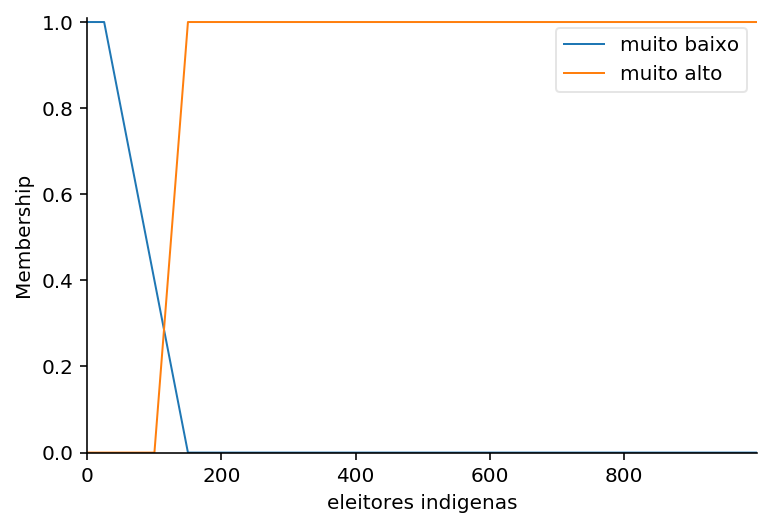

In [15]:
# Eleitores indígenas
ei= ctrl.Antecedent(np.arange(0, 1000, 1), 'eleitores indigenas')

ei['muito baixo'] = fuzz.trapmf(ei.universe, [0, 0, 25, 150])
ei['muito alto'] = fuzz.trapmf(ei.universe, [100, 150, 1000, 1000])

ei.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


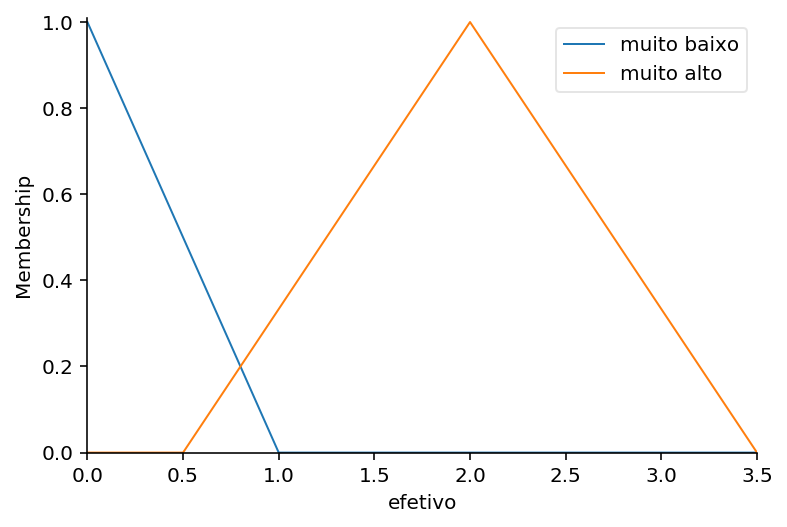

In [16]:
# Estimativa de efetivo (ei)
ef_ei = ctrl.Consequent(np.arange(0, 3.6, 0.1), 'efetivo')

ef_ei['muito baixo'] = fuzz.trimf(ef_ei.universe, [0, 0, 1])
ef_ei['muito alto'] = fuzz.trimf(ef_ei.universe, [0.5, 2, 3.5])

ef_ei.view()

In [17]:
# Eleitores indígenas (ei)
regra_ei_ma_1 = ctrl.Rule(ei['muito alto'], ef_ei['muito alto'])
regra_ei_mb_1 = ctrl.Rule(ei['muito baixo'], ef_ei['muito baixo'])

In [18]:
# Cria um sistema de controle e uma simulação para eleitores indígenas
eleicao_ei_ctrl = ctrl.ControlSystem([regra_ei_ma_1, regra_ei_mb_1])
eleicao_ei_sim = ctrl.ControlSystemSimulation(eleicao_ei_ctrl)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


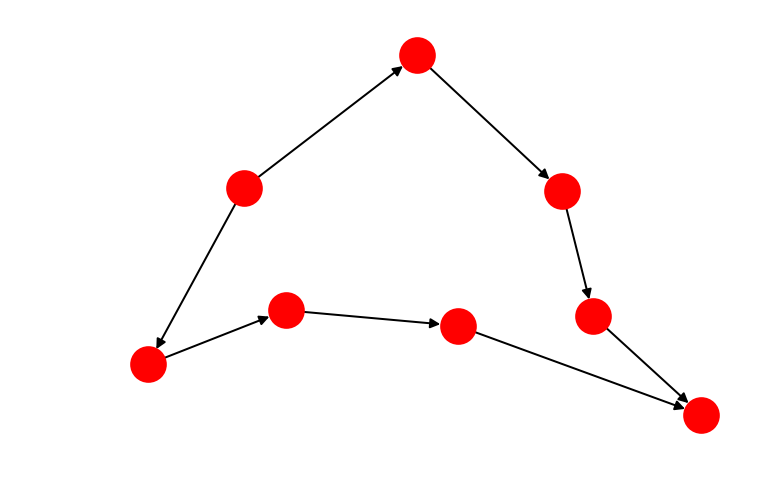

In [19]:
eleicao_ei_ctrl.view()

OrderedDict([('efetivo', 0.34444444444444444)])


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


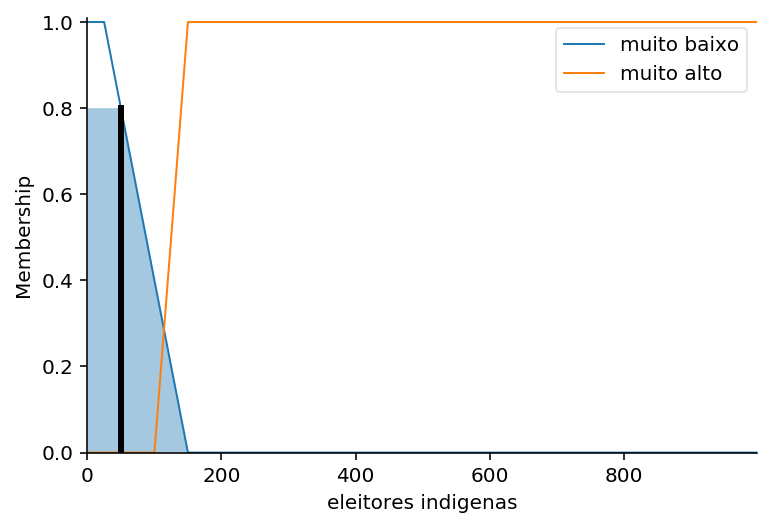

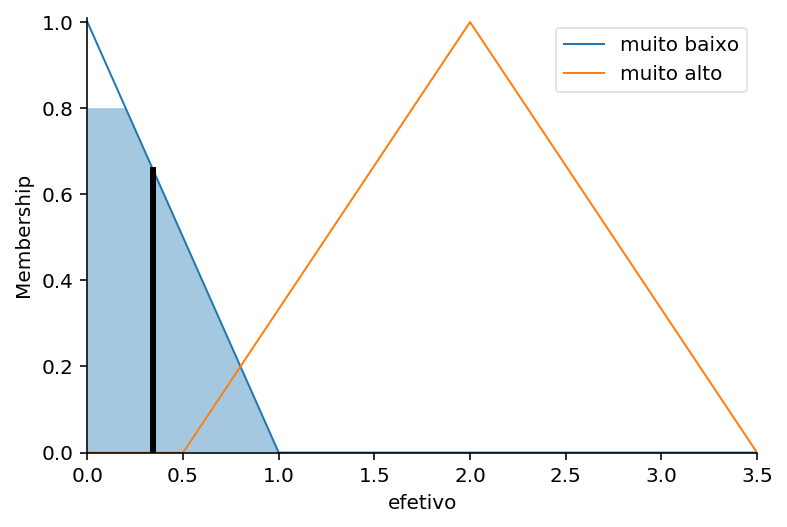

In [20]:
# Entrada
eleicao_ei_sim.input['eleitores indigenas'] = 50

# Calcula
eleicao_ei_sim.compute()
n_ef_ei = eleicao_ei_sim.output
print(n_ef_ei)

# Gráfico dos antecedentes e consequentes a partir dos cálculos
ei.view(sim=eleicao_ei_sim)
ef_ei.view(sim=eleicao_ei_sim)

# Modelo final

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


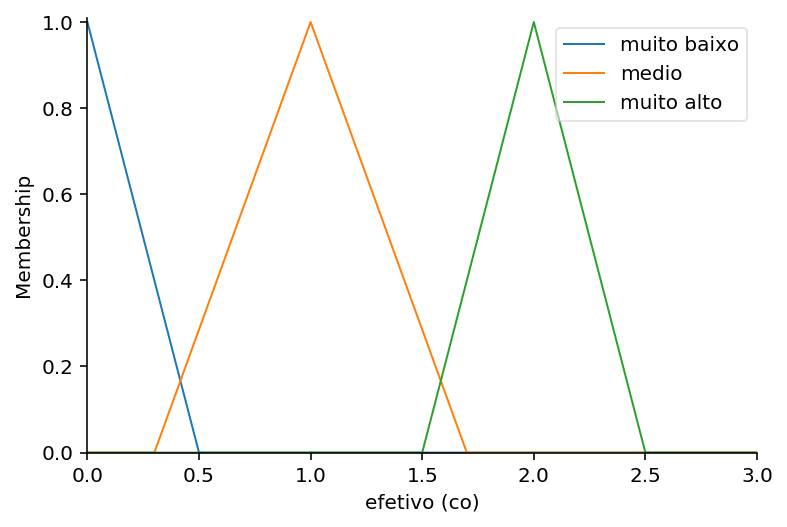

In [21]:
# Estimativa de efetivo (co) antecedente
ef_co_a = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'efetivo (co)')

ef_co_a['muito baixo'] = fuzz.trimf(ef_co_a.universe, [0, 0, 0.5])
ef_co_a['medio'] = fuzz.trimf(ef_co_a.universe, [0.3, 1.0, 1.7])
ef_co_a['muito alto'] = fuzz.trimf(ef_co_a.universe, [1.5, 2.0, 2.5])

ef_co_a.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


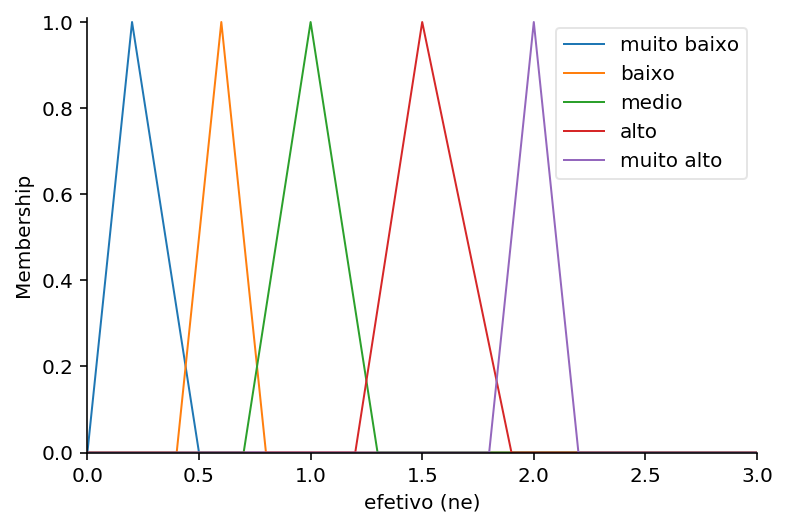

In [22]:
# Estimativa de efetivo (ne) antecedente
ef_ne_a = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'efetivo (ne)')

ef_ne_a['muito baixo'] = fuzz.trimf(ef_ne_a.universe, [0, 0.2, 0.5])
ef_ne_a['baixo'] = fuzz.trimf(ef_ne_a.universe, [0.4, 0.6, 0.8])
ef_ne_a['medio'] = fuzz.trimf(ef_ne_a.universe, [0.7, 1.0, 1.3])
ef_ne_a['alto'] = fuzz.trimf(ef_ne_a.universe, [1.2, 1.5, 1.9])
ef_ne_a['muito alto'] = fuzz.trimf(ef_ne_a.universe, [1.8, 2, 2.2])

ef_ne_a.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


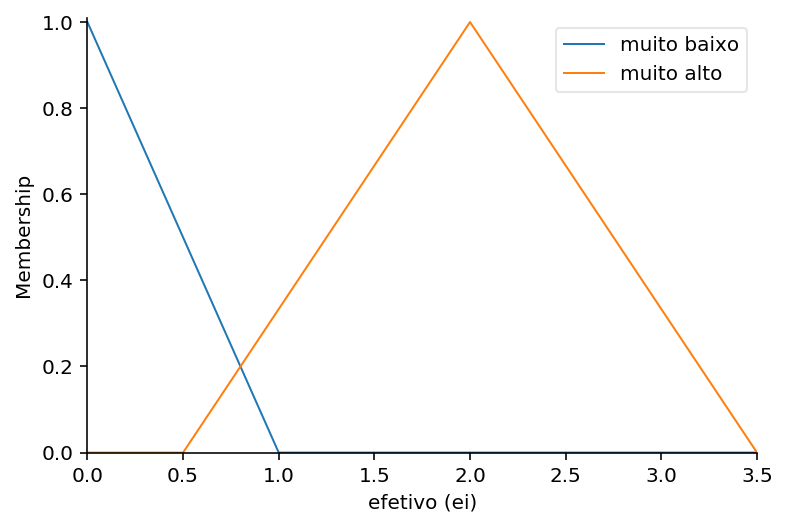

In [23]:
# Estimativa de efetivo (ei) antecedente
ef_ei_a = ctrl.Antecedent(np.arange(0, 3.6, 0.1), 'efetivo (ei)')

ef_ei_a['muito baixo'] = fuzz.trimf(ef_ei_a.universe, [0, 0, 1])
ef_ei_a['muito alto'] = fuzz.trimf(ef_ei_a.universe, [0.5, 2, 3.5])

ef_ei_a.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


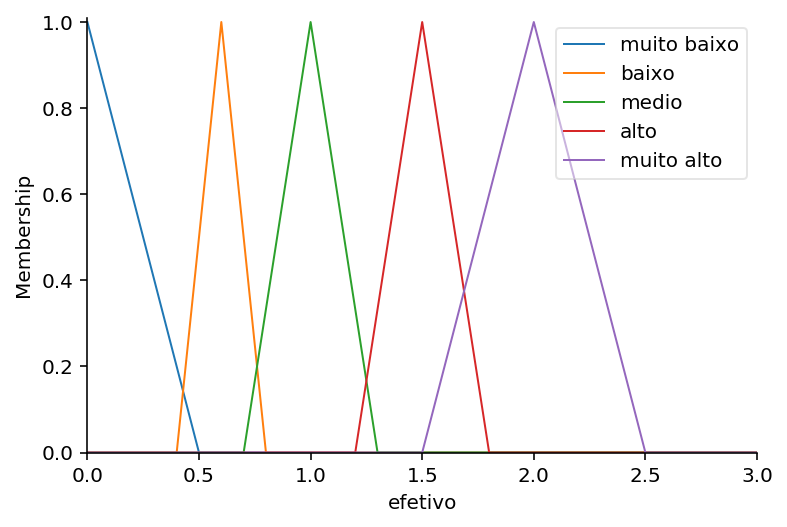

In [24]:
# Estimativa de efetivo (total)
ef = ctrl.Consequent(np.arange(0, 3.1, 0.1), 'efetivo')

ef['muito baixo'] = fuzz.trimf(ef.universe, [0, 0, 0.5])
ef['baixo'] = fuzz.trimf(ef.universe, [0.4, 0.6, 0.8])
ef['medio'] = fuzz.trimf(ef.universe, [0.7, 1.0, 1.3])
ef['alto'] = fuzz.trimf(ef.universe, [1.2, 1.5, 1.8])
ef['muito alto'] = fuzz.trimf(ef.universe, [1.5, 2.0, 2.5])

ef.view()

In [25]:
# Regras gerais
regra_ma_1 = ctrl.Rule(ef_co_a['muito alto'] | ef_ne_a['muito alto'] | ef_ei_a['muito alto'], ef['muito alto'])

regra_a_1 = ctrl.Rule(~ef_co_a['muito alto'] & ef_ne_a['alto'] & ef_ei_a['muito baixo'], ef['alto'])

regra_m_1 = ctrl.Rule(ef_co_a['medio'] & (ef_ne_a['medio'] | ef_ne_a['baixo'] | ef_ne_a['muito baixo']) & ef_ei_a['muito baixo'], ef['medio'])
regra_m_2 = ctrl.Rule((ef_co_a['medio'] | ef_co_a['muito baixo']) & ef_ne_a['medio'] & ef_ei_a['muito baixo'], ef['medio'])

regra_b_1 = ctrl.Rule(ef_co_a['muito baixo'] & ef_ne_a['baixo'] & ef_ei_a['muito baixo'], ef['baixo'])

regra_mb_1 = ctrl.Rule(ef_co_a['muito baixo'] & ef_ne_a['muito baixo'] & ef_ei_a['muito baixo'], ef['muito baixo'])

In [26]:
# Cria um sistema de controle e uma simulação total
eleicao_ctrl = ctrl.ControlSystem([regra_ma_1,
                                   regra_a_1,
                                   regra_m_1, regra_m_2,
                                   regra_b_1,
                                   regra_mb_1])
eleicao_sim = ctrl.ControlSystemSimulation(eleicao_ctrl)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


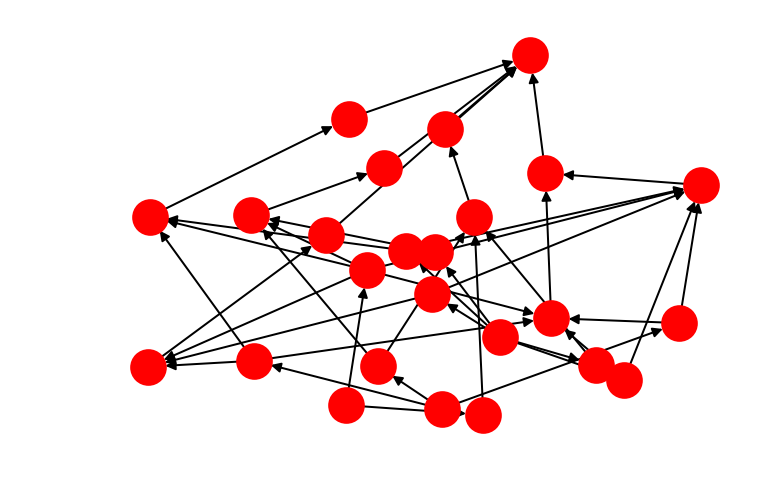

In [27]:
eleicao_ctrl.view()

In [28]:
n_ef_co['efetivo']

0.16666666666666663

In [29]:
n_ef_ne['efetivo']

0.6000000000000001

In [30]:
n_ef_ei['efetivo']

0.34444444444444444

OrderedDict([('efetivo', 0.6)])


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


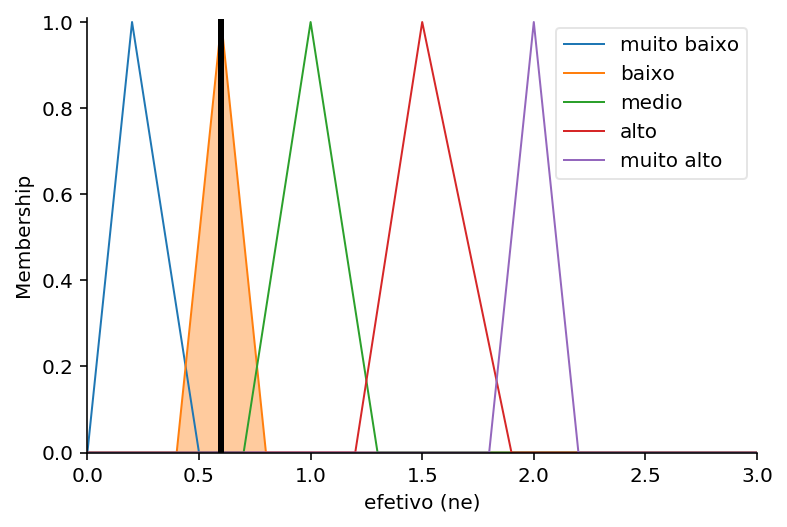

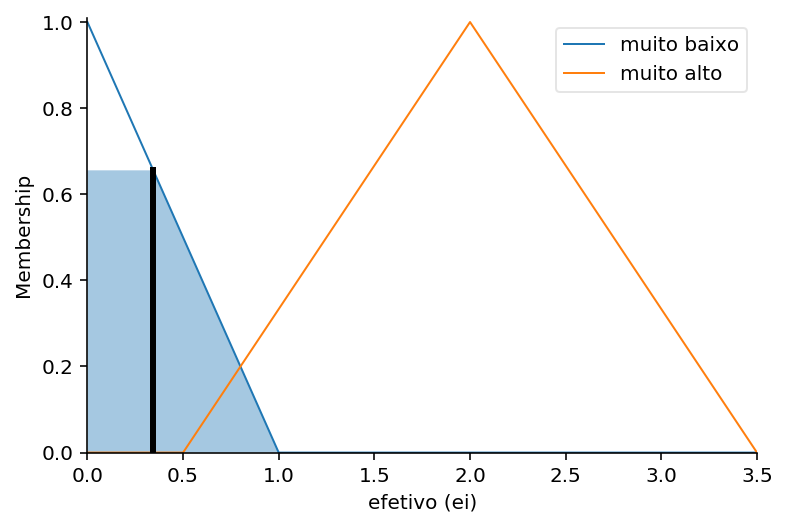

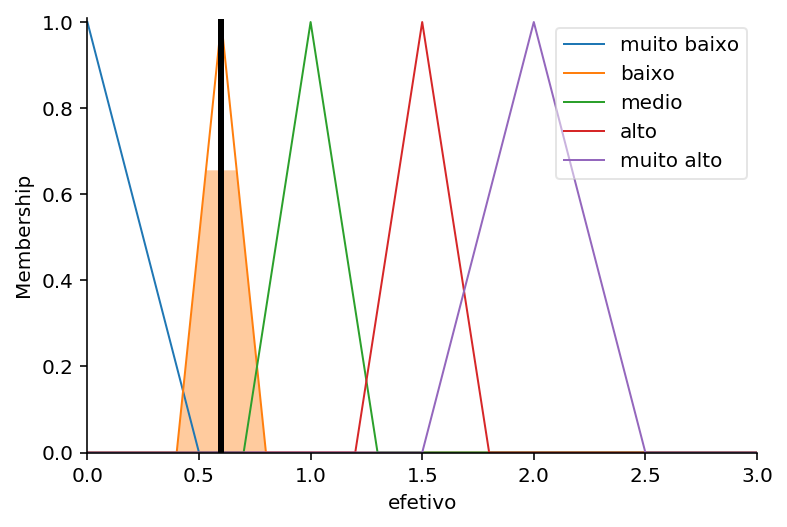

In [31]:
# Entrada
eleicao_sim.input['efetivo (co)'] = n_ef_co['efetivo']
eleicao_sim.input['efetivo (ne)'] = n_ef_ne['efetivo']
eleicao_sim.input['efetivo (ei)'] = n_ef_ei['efetivo']

# Calcula
eleicao_sim.compute()
n_ef = eleicao_sim.output
print(n_ef)

# Gráfico dos antecedentes e consequentes a partir dos cálculos
ef_co_a.view(sim=eleicao_sim)
ef_ne_a.view(sim=eleicao_sim)
ef_ei_a.view(sim=eleicao_sim)
ef.view(sim=eleicao_sim)

# Função para entrada e processamento dos dados

In [32]:
def est_ef(cas):
    ## Entrada
    # print(cas)
    # co
    eleicao_co_sim.input['presenca do crime organizado'] = cas[1]
    eleicao_co_sim.compute()
    n_ef_co = eleicao_co_sim.output
    #print('co: ', n_ef_co)

    # ne
    eleicao_ne_sim.input['numero de eleitores'] = cas[2]
    eleicao_ne_sim.compute()
    n_ef_ne = eleicao_ne_sim.output
    #print('ne: ', n_ef_ne)

    # ei
    eleicao_ei_sim.input['eleitores indigenas'] = cas[3]
    eleicao_ei_sim.compute()
    n_ef_ei = eleicao_ei_sim.output
    #print('ei: ', n_ef_ei)

    ## ef
    eleicao_sim.input['efetivo (co)'] = n_ef_co['efetivo']
    eleicao_sim.input['efetivo (ne)'] = n_ef_ne['efetivo']
    eleicao_sim.input['efetivo (ei)'] = n_ef_ei['efetivo']
    eleicao_sim.compute()

    # print('-> ', eleicao_sim.output['efetivo'])
    return(eleicao_sim.output['efetivo'])

In [33]:
#      id co ne   ei
est_ef([1, 0, 95,  90])

0.18511609712110966

# Cálculo da planilha

In [34]:
import pandas as pd

In [35]:
df = pd.read_excel('res1.xlsx', sheet_name='dados')

In [36]:
df[:5]

longitude 
 latitude 
 COD_LOCALIDADE_TSE 
 NOM_LOCALIDADE_1 
 NOM_BAIRRO 
 NUM_LOCAL 
 NOM_LOCAL 
 DES_ENDERECO 
 CODIGO 
 LQTD_SECOES 
 LQTD_APTOS 
 INDIGENAS 
 CV 
 GRUPOS VMP 
 
 
 
 
 0 
 -56.104889 
 -15.589418 
 90670 
 CUIABÁ 
 QUILOMBO 
 2593 
 COLÉGIO MAXI 
 RUA ESTEVÃO DE MENDONÇA, 1000 
 1906702593 
 16 
 6309 
 0 
 0 
 192 
 
 
 1 
 -56.098308 
 -15.592559 
 90670 
 CUIABÁ 
 CENTRO 
 1015 
 INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO... 
 RUA ZULMIRA CANAVARROS, 95 
 1906701015 
 24 
 4916 
 0 
 0 
 192 
 
 
 2 
 -56.081131 
 -15.579708 
 90670 
 CUIABÁ 
 ALVORADA 
 2488 
 ESCOLA MUNICIPAL CÂNDIDO MARIANO DA SILVA RONDON 
 RUA PIRATININGA, 101 
 1906702488 
 12 
 4571 
 0 
 100 
 201 
 
 
 3 
 -56.113951 
 -15.613200 
 90670 
 CUIABÁ 
 PORTO 
 2844 
 ESCOLA ESTADUAL JOSÉ BARNABÉ DE MESQUITA 
 RUA BARÃO DE MELGACO, 945 
 1906702844 
 13 
 4471 
 0 
 100 
 193 
 
 
 4 
 -56.128743 
 -15.618736 
 90670 
 CUIABÁ 
 COOPHAMIL 
 2810 
 ESCOLA MUNICIPAL DE EDUCAÇÃO BÁSICA PROFESSOR ... 
 RUA JOÃO PAULO DOS SANTOS, S/N 
 1906702810 
 12 
 4308 
 0 
 0 
 222

In [37]:
df[['CODIGO','CV','LQTD_APTOS','INDIGENAS']][:5]

CODIGO 
 CV 
 LQTD_APTOS 
 INDIGENAS 
 
 
 
 
 0 
 1906702593 
 0 
 6309 
 0 
 
 
 1 
 1906701015 
 0 
 4916 
 0 
 
 
 2 
 1906702488 
 100 
 4571 
 0 
 
 
 3 
 1906702844 
 100 
 4471 
 0 
 
 
 4 
 1906702810 
 0 
 4308 
 0

In [38]:
df[['CODIGO','CV','LQTD_APTOS','INDIGENAS']][1440:1445]

CODIGO 
 CV 
 LQTD_APTOS 
 INDIGENAS 
 
 
 
 
 1440 
 57908241112 
 0 
 118 
 118 
 
 
 1441 
 57898341228 
 0 
 110 
 0 
 
 
 1442 
 57908241104 
 0 
 110 
 0 
 
 
 1443 
 57908241082 
 0 
 95 
 95 
 
 
 1444 
 57898341171 
 0 
 58 
 0

In [39]:
df['EFETIVO'] = df[['CODIGO','CV','LQTD_APTOS','INDIGENAS']].apply(est_ef, axis = 1)

In [40]:
df[348:350]

longitude 
 latitude 
 COD_LOCALIDADE_TSE 
 NOM_LOCALIDADE_1 
 NOM_BAIRRO 
 NUM_LOCAL 
 NOM_LOCAL 
 DES_ENDERECO 
 CODIGO 
 LQTD_SECOES 
 LQTD_APTOS 
 INDIGENAS 
 CV 
 GRUPOS VMP 
 EFETIVO 
 
 
 
 
 348 
 -54.922355 
 -15.809898 
 90719 
 DOM AQUINO 
 CENTRO 
 1023 
 E. M. PROF. JULIANA NAZARÉ DE OLIVEIRA 
 AVENIDA PRESIDENTE VARGAS S/N 
 12907191023 
 6 
 1289 
 0 
 0 
 282 
 1.5 
 
 
 349 
 -54.922355 
 -15.809898 
 90719 
 DOM AQUINO 
 VILA ESPORTIVA 
 1082 
 ESCOLA ESTADUAL VINÍCIUS DE MORAES 
 AVENIDA JOÃO FURTADO DE MENDONÇA 
 12907191082 
 4 
 1277 
 0 
 0 
 282 
 1.5

In [41]:
df[:5]

longitude 
 latitude 
 COD_LOCALIDADE_TSE 
 NOM_LOCALIDADE_1 
 NOM_BAIRRO 
 NUM_LOCAL 
 NOM_LOCAL 
 DES_ENDERECO 
 CODIGO 
 LQTD_SECOES 
 LQTD_APTOS 
 INDIGENAS 
 CV 
 GRUPOS VMP 
 EFETIVO 
 
 
 
 
 0 
 -56.104889 
 -15.589418 
 90670 
 CUIABÁ 
 QUILOMBO 
 2593 
 COLÉGIO MAXI 
 RUA ESTEVÃO DE MENDONÇA, 1000 
 1906702593 
 16 
 6309 
 0 
 0 
 192 
 2.0 
 
 
 1 
 -56.098308 
 -15.592559 
 90670 
 CUIABÁ 
 CENTRO 
 1015 
 INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO... 
 RUA ZULMIRA CANAVARROS, 95 
 1906701015 
 24 
 4916 
 0 
 0 
 192 
 2.0 
 
 
 2 
 -56.081131 
 -15.579708 
 90670 
 CUIABÁ 
 ALVORADA 
 2488 
 ESCOLA MUNICIPAL CÂNDIDO MARIANO DA SILVA RONDON 
 RUA PIRATININGA, 101 
 1906702488 
 12 
 4571 
 0 
 100 
 201 
 2.0 
 
 
 3 
 -56.113951 
 -15.613200 
 90670 
 CUIABÁ 
 PORTO 
 2844 
 ESCOLA ESTADUAL JOSÉ BARNABÉ DE MESQUITA 
 RUA BARÃO DE MELGACO, 945 
 1906702844 
 13 
 4471 
 0 
 100 
 193 
 2.0 
 
 
 4 
 -56.128743 
 -15.618736 
 90670 
 CUIABÁ 
 COOPHAMIL 
 2810 
 ESCOLA MUNICIPAL DE EDUCAÇÃO BÁSICA PROFESSOR ... 
 RUA JOÃO PAULO DOS SANTOS, S/N 
 1906702810 
 12 
 4308 
 0 
 0 
 222 
 2.0

In [42]:
res2 = pd.ExcelWriter('res2.xlsx')
df.to_excel(res2,'dados',index=False)
res2.save()